# Gaussian Mixture Models

### *a simple GMM to generate faces*     
     
     

Methods covered in this notebook:
* Gaussian mixture models
* Dimensionality reduction with PCA
* Akaike information criterion, Bayesian information criterion


In [9]:
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline
from sklearn.mixture import GaussianMixture as GMM

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)

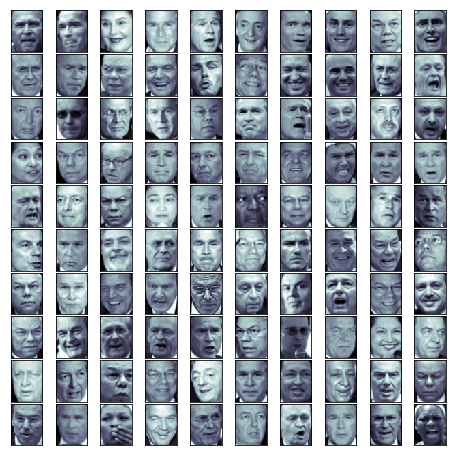

In [10]:
# plot some faces

def plot_faces(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(62, 47), cmap='bone')
plot_faces(faces.data)

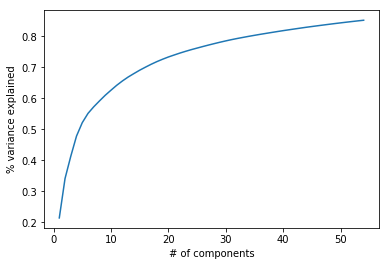

In [35]:
# reduce dimensionality of data

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.85, whiten=True) 
data = pca.fit_transform(faces.data)
plt.plot(np.arange(1,data.shape[1]+1),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# of components')
plt.ylabel('% variance explained');

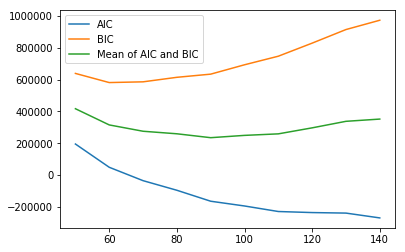

In [36]:
# AIC, BIC
n_components = np.arange(50, 150, 10)
models = [GMM(n, covariance_type='full', random_state=0).fit(data)
          for n in n_components]
aics = [model.aic(data) for model in models]
bics = [model.bic(data) for model in models]
plt.plot(n_components, aics);
plt.plot(n_components, bics);
plt.plot(n_components, (np.array(aics) + np.array(bics))/2)
plt.legend(['AIC', 'BIC', 'Mean of AIC and BIC']);

True


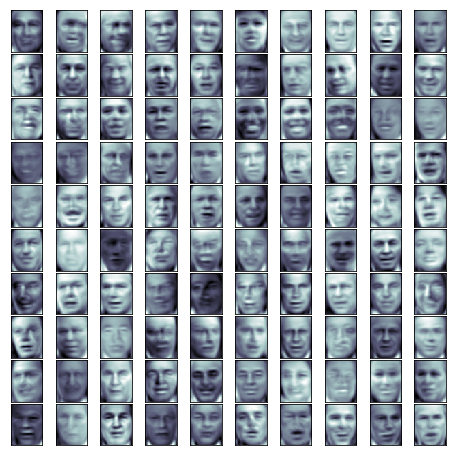

In [33]:
# generate new data

gmm = GMM(90, covariance_type='full', random_state=0) # chosen based on min of mean of AIC and BIC
gmm.fit(data)
print(gmm.converged_) # make sure the model converged

data_new = gmm.sample(100)[0]

data_transformed = pca.inverse_transform(data_new)
plot_faces(data_transformed)

list